In [1]:
import random, time, os, sys, json
from tqdm import tqdm

In [2]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("./outputs/record_err_256.csv")
df

,Unnamed: 0,method,seed,mse,mean,std,params,time
0,0,pair,147,0.304871,0.471620,0.287135,4096,0.000514
1,1,block-sqrt-half,147,0.278746,0.445010,0.284101,6144,0.000173
2,2,block-sqrt,147,0.265651,0.431746,0.281509,8192,0.000124
3,3,lowR-same-param,147,0.263663,0.430296,0.280196,8192,0.000090
4,4,lowR-samex2,147,0.208172,0.374343,0.260846,8192,0.000069
...,...,...,...,...,...,...,...,...
99,99,lowR-same-param,753,0.261658,0.428652,0.279136,8192,0.000063
100,100,lowR-samex2,753,0.206225,0.372462,0.259803,8192,0.000050
101,101,lowR-half,753,0.034998,0.149228,0.112825,65536,0.000059
102,102,pair-Add,753,0.134909,0.291823,0.223046,32768,0.004418


In [6]:
df.columns

Index(['Unnamed: 0', 'method', 'seed', 'mse', 'mean', 'std', 'params', 'time'], dtype='object')

In [7]:
df = df.drop(columns = df.columns[0])

In [8]:
df.head(20)

,method,seed,mse,mean,std,params,time
0,pair,147,0.304871,0.471620,0.287135,4096,0.000514
1,block-sqrt-half,147,0.278746,0.445010,0.284101,6144,0.000173
2,block-sqrt,147,0.265651,0.431746,0.281509,8192,0.000124
3,lowR-same-param,147,0.263663,0.430296,0.280196,8192,0.000090
4,lowR-samex2,147,0.208172,0.374343,0.260846,8192,0.000069
5,lowR-half,147,0.035400,0.150246,0.113253,65536,0.000061
6,pair-Add,147,0.137250,0.294642,0.224582,32768,0.004199
7,pair-Seq,147,0.139986,0.300176,0.223341,32768,0.004345
8,pair,258,0.305046,0.471470,0.287686,4096,0.000521
9,block-sqrt-half,258,0.279041,0.445260,0.284229,6144,0.000182


In [9]:
methods = list(df['method'].unique())
methods

['pair',
 'block-sqrt-half',
 'block-sqrt',
 'lowR-same-param',
 'lowR-samex2',
 'lowR-half',
 'pair-Add',
 'pair-Seq']

In [10]:
mse_vals = []
mae_vals = []
mean_time = []
params = []

for m in methods:
    tdf = df.loc[df['method'] == m]
    mse = tdf['mse'].mean()
    mae = tdf['mean'].mean()
    tim = tdf['time'].mean()
    parm = tdf['params'].iloc[0]
    
    mse_vals += [mse]
    mae_vals += [mae]
    mean_time += [tim]
    params += [parm]


In [11]:
mse_vals

[0.3045164988591121,
 0.2782907004539783,
 0.2647584287019876,
 0.2632539455707257,
 0.20791495419465578,
 0.035383076621935884,
 0.13645293162419242,
 0.14104285033849567]

In [12]:
mkr = ['P']*3 + ['*']*3 + ['o'] + ['.']*10

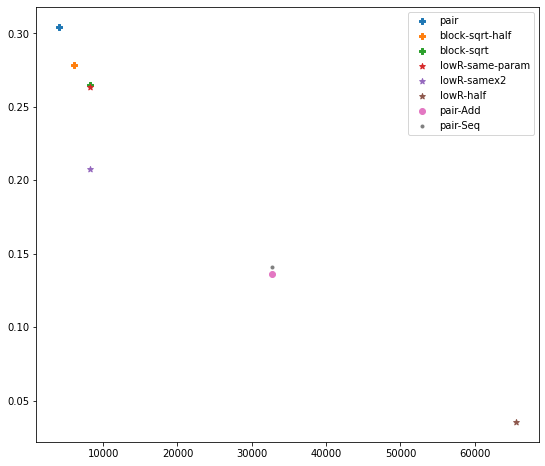

In [13]:
fig = plt.figure(figsize=(9, 8))
for i, m in enumerate(methods):
    plt.scatter(params[i], mse_vals[i], label=f'{m}', marker=mkr[i])
plt.legend()